In [107]:
# 데이터셋 설명
# Country name 나라명, Iso alpha ISO나라코드, year 년도, Happiness score 행복도점수, Log GDP per capita 1인당총생산
# Social support 사회지원, Healthy life expectancy at birth 기대수명, Freedom to make life choices 자유인식정도
# Generosity 관대함수준, Perceptions of corruption 부패에대한인식, Positive affect 긍정적 영향, Negative affect 부정적영향

#라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import streamlit as st
import seaborn as sns

# 폰트 지정
plt.rcParams["font.family"] = 'Malgun Gothic'
# 마이너스 깨짐 지정
plt.rcParams["axes.unicode_minus"] = False
# 실수표시 지정
pd.options.display.float_format = "{:.2f}".format

# 데이터셋 불러오기
file_path = "dataset/whr_200522.csv"
df = pd.read_csv(file_path, encoding="CP949")
print("데이터크기: ", df.shape)
df.head()

데이터크기:  (2199, 12)


,Country name,Iso alpha,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,AFG,2008,3.72,7.35,0.45,50.50,0.72,0.17,0.88,0.41,0.26
1,Afghanistan,AFG,2009,4.40,7.51,0.55,50.80,0.68,0.19,0.85,0.48,0.24
2,Afghanistan,AFG,2010,4.76,7.61,0.54,51.10,0.60,0.12,0.71,0.52,0.28
3,Afghanistan,AFG,2011,3.83,7.58,0.52,51.40,0.50,0.16,0.73,0.48,0.27
4,Afghanistan,AFG,2012,3.78,7.66,0.52,51.70,0.53,0.24,0.78,0.61,0.27


In [3]:
# 데이터 정보확인
print("데이터기간: ",df['year'].min(),"~",df['year'].max())
print("총 관측 수: ",len(df))
print("지역 수: ",df['Country name'].nunique())

데이터기간:  2005 ~ 2022
총 관측 수:  2199
지역 수:  165


In [142]:
# ydata-profiling 생성
profile = ProfileReport(df, title="World Happiness Profiling Report", explorative=True)
output_file = "report/report_before2.html"
profile.to_file(output_file)

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 43.54it/s]


In [4]:
# 결측치 확인
print("결측치 수: ",df.isnull().sum())

결측치 수:  Country name                          0
Iso alpha                             0
year                                  0
Happiness score                       0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64


In [5]:
# 데이터 전처리
# 결측치 처리()
df['Log GDP per capita'] = df['Log GDP per capita'].fillna(df['Log GDP per capita'].mean())       # 1인당 GDP
df['Social support'] = df['Social support'].fillna(df['Social support'].mean())               # 사회적 지원
df['Healthy life expectancy at birth'] = df['Healthy life expectancy at birth'].fillna(df['Healthy life expectancy at birth'].mean())        # 기대수명
df['Freedom to make life choices'] = df['Freedom to make life choices'].fillna(df['Freedom to make life choices'].mean())               # 선택의자유
df['Generositys'] = df['Generosity'].fillna(df['Generosity'].mean())                      # 관대함수준
df['Perceptions of corruption'] = df['Perceptions of corruption'].fillna(df['Perceptions of corruption'].mean())                     # 부패의대한인식
df['Positive affect'] = df['Positive affect'].fillna(df['Positive affect'].mean())             # 긍정적영향
df['Negative affect'] = df['Negative affect'].fillna(df['Negative affect'].mean())             # 부정적영향

# 원-핫 인코딩
df_en = pd.get_dummies(df, columns=['Country name'],prefix='nn')

# 전처리 확인
display(df_en.head())

print("결측치 수: ",df_en.isnull().sum())

,Iso alpha,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,nn_United Arab Emirates,nn_United Kingdom,nn_United States,nn_Uruguay,nn_Uzbekistan,nn_Venezuela,nn_Vietnam,nn_Yemen,nn_Zambia,nn_Zimbabwe
0,AFG,2008,3.72,7.35,0.45,50.50,0.72,0.17,0.88,0.41,...,False,False,False,False,False,False,False,False,False,False
1,AFG,2009,4.40,7.51,0.55,50.80,0.68,0.19,0.85,0.48,...,False,False,False,False,False,False,False,False,False,False
2,AFG,2010,4.76,7.61,0.54,51.10,0.60,0.12,0.71,0.52,...,False,False,False,False,False,False,False,False,False,False
3,AFG,2011,3.83,7.58,0.52,51.40,0.50,0.16,0.73,0.48,...,False,False,False,False,False,False,False,False,False,False
4,AFG,2012,3.78,7.66,0.52,51.70,0.53,0.24,0.78,0.61,...,False,False,False,False,False,False,False,False,False,False


결측치 수:  Iso alpha             0
year                  0
Happiness score       0
Log GDP per capita    0
Social support        0
                     ..
nn_Venezuela          0
nn_Vietnam            0
nn_Yemen              0
nn_Zambia             0
nn_Zimbabwe           0
Length: 177, dtype: int64


In [144]:
# ydata-profiling 생성
profile = ProfileReport(df, title="World Happiness Profiling Report", explorative=True)
output_file = "report/report4.html"
profile.to_file(output_file)

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 34.50it/s]


In [63]:
# 모델
feature_names = ['year',
                 'Log GDP per capita',
                 'Social support',
                 'Healthy life expectancy at birth',
                 'Freedom to make life choices',
                 'Generosity',
                 'Perceptions of corruption',
                 'Positive affect',
                 'Negative affect'] + [col for col in df_en.columns if col.startswith('nn_')]
feature_names2 = ['year',
                 'Log GDP per capita',
                 'Social support',
                 'Healthy life expectancy at birth',
                 'Freedom to make life choices',
                 'Generosity',
                 'Perceptions of corruption',
                 'Positive affect',
                 'Negative affect']
X = df_en[feature_names2]
y = df_en['Happiness score']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)

# 하이퍼파라미터 튜닝 GridSearchCV 사용
param_grid = {
    'n_estimators': [50,100,200,300],
    'max_depth':[4,6,8,10,12,14,16,18,20],
    'min_samples_split':[2,4,8,16]
}

# 모델 학습
# 최적의 모델 저장
#grid_search = GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=3)
#grid_search.fit(X_train,y_train)
#best_rf_model = grid_search.best_estimator_
#print("Best Param:", grid_search.best_params_)
rf_model = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=16, min_samples_split=2)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=16, n_estimators=300, random_state=42)

In [64]:
# 예측
rf_pred = rf_model.predict(X_test)
#rf_pred = best_rf_model.predict(X_test)

# 성능 평가
rf_mse = mean_squared_error(y_test,rf_pred)
rf_rmse = root_mean_squared_error(y_test,rf_pred)
rf_mae = mean_absolute_error(y_test,rf_pred)
rf_r2 = r2_score(y_test,rf_pred)
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE: {rf_mae:.2f}")
print(f"R2: {rf_r2:.2f}")

MSE: 0.18
RMSE: 0.43
MAE: 0.32
R2: 0.84


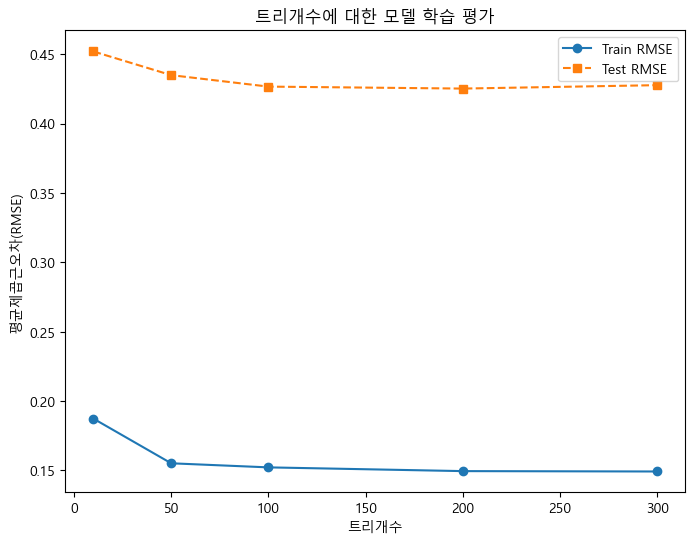

In [65]:
# 학습과정 시각화
n_estimators_range = [10, 50, 100, 200, 300]
train_errors = []
test_errors = []

# 각 트리 개수에 대한 모델 학습 및 평가
for n in n_estimators_range:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    
    train_pred = rf_model.predict(X_train)
    test_pred = rf_model.predict(X_test)

    train_errors.append(root_mean_squared_error(y_train, train_pred))
    test_errors.append(root_mean_squared_error(y_test, test_pred))

# 시각화
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_range, train_errors, label="Train RMSE", marker='o')
plt.plot(n_estimators_range, test_errors, label="Test RMSE", marker='s', linestyle='dashed')
plt.xlabel("트리개수")
plt.ylabel("평균제곱근오차(RMSE)")
plt.title("트리개수에 대한 모델 학습 평가")
plt.legend()
plt.show()

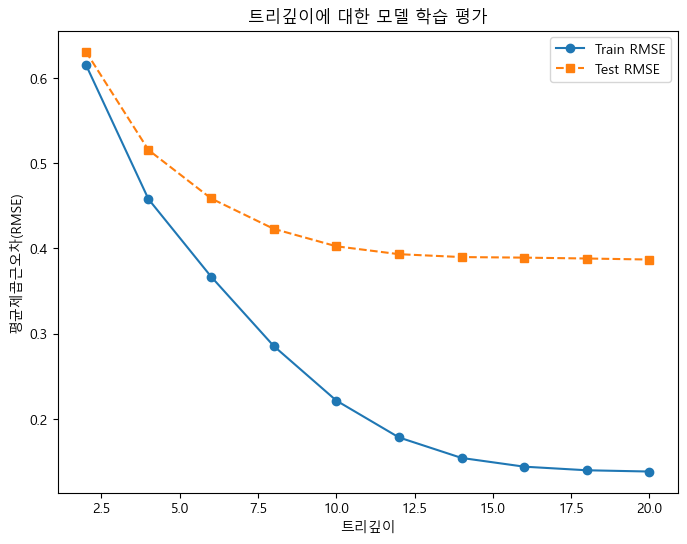

In [9]:
max_depth_range = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
train_errors = []
test_errors = []

for depth in max_depth_range:
    rf_model = RandomForestRegressor(max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)

    train_pred = rf_model.predict(X_train)
    test_pred = rf_model.predict(X_test)

    train_errors.append(root_mean_squared_error(y_train, train_pred))
    test_errors.append(root_mean_squared_error(y_test, test_pred))

plt.figure(figsize=(8, 6))
plt.plot(max_depth_range, train_errors, label="Train RMSE", marker='o')
plt.plot(max_depth_range, test_errors, label="Test RMSE", marker='s', linestyle='dashed')
plt.xlabel("트리깊이")
plt.ylabel("평균제곱근오차(RMSE)")
plt.title("트리깊이에 대한 모델 학습 평가")
plt.legend()
plt.show()

                            feature  importance
1                Log GDP per capita        0.58
7                   Positive affect        0.13
3  Healthy life expectancy at birth        0.11
2                    Social support        0.06
8                   Negative affect        0.03
6         Perceptions of corruption        0.03
4      Freedom to make life choices        0.03
5                        Generosity        0.03
0                              year        0.01


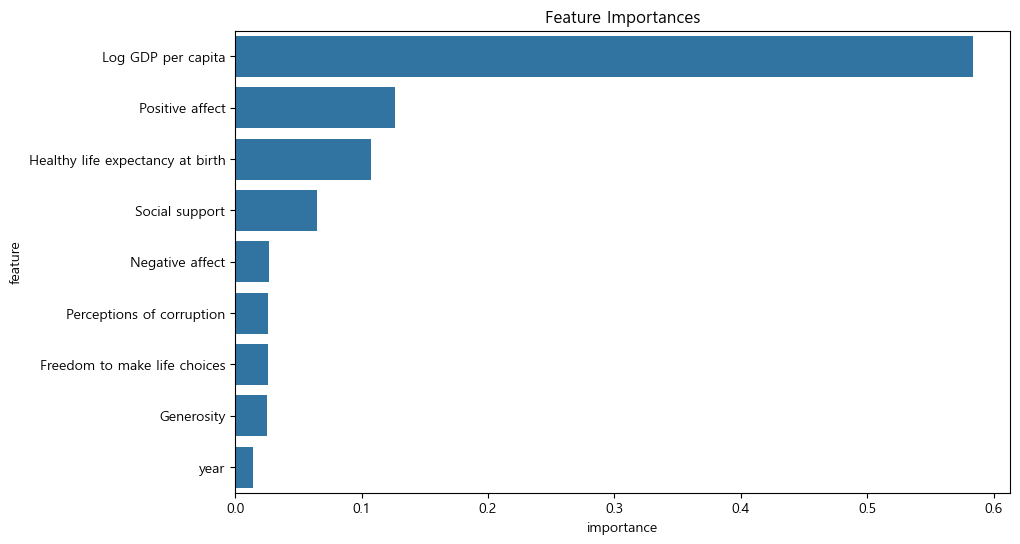

In [115]:
# Feature Importance 시각화(나라)
feature_importances = rf_model.feature_importances_
#feature_names_country_x = feature_names.iloc[1:9].values
#print(feature_importances)
feature_importance_df = pd.DataFrame({'feature': feature_names2, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

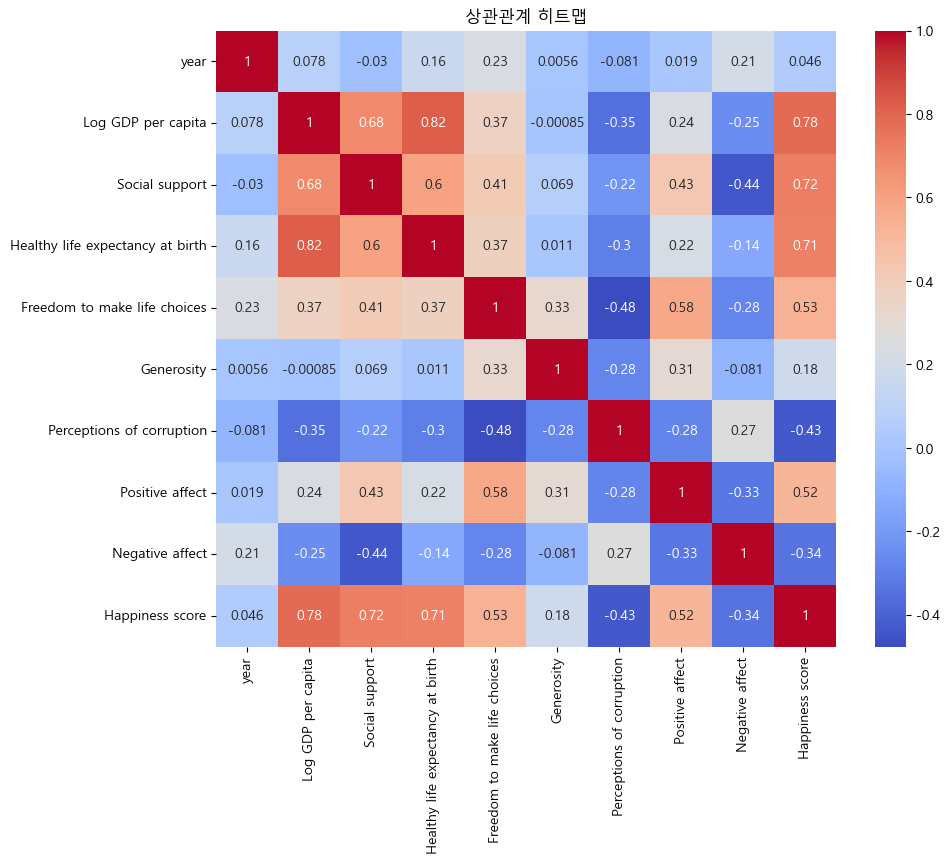

In [116]:
# 변수별 상관관계 히트맵
heat_df = df[feature_names[0:9]+['Happiness score']]
plt.figure(figsize=(10, 8))
sns.heatmap(heat_df.corr(), annot=True, cmap='coolwarm')
plt.title('상관관계 히트맵')
plt.show()

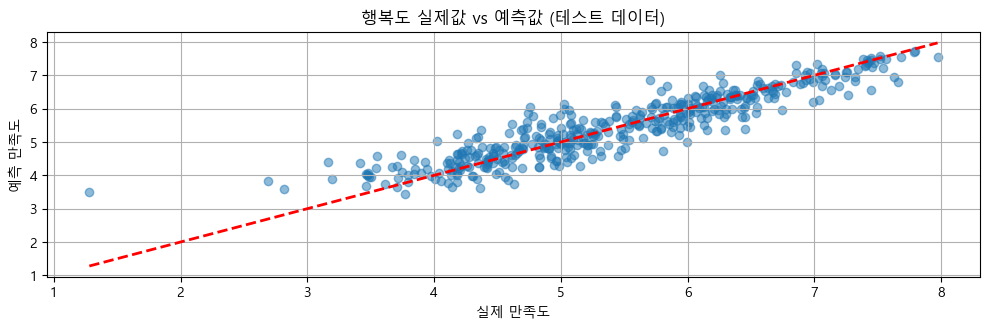

In [108]:
# 실제값과 예측값 비교 시각화 (테스트 데이터 기준)
#print(rf_pred)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel('실제 만족도')
plt.ylabel('예측 만족도')
plt.title('행복도 실제값 vs 예측값 (테스트 데이터)')
plt.grid(True)
plt.tight_layout()
#%matplotlib inline
plt.show()
#plt.savefig("report/output.png")

<Figure size 1000x600 with 0 Axes>

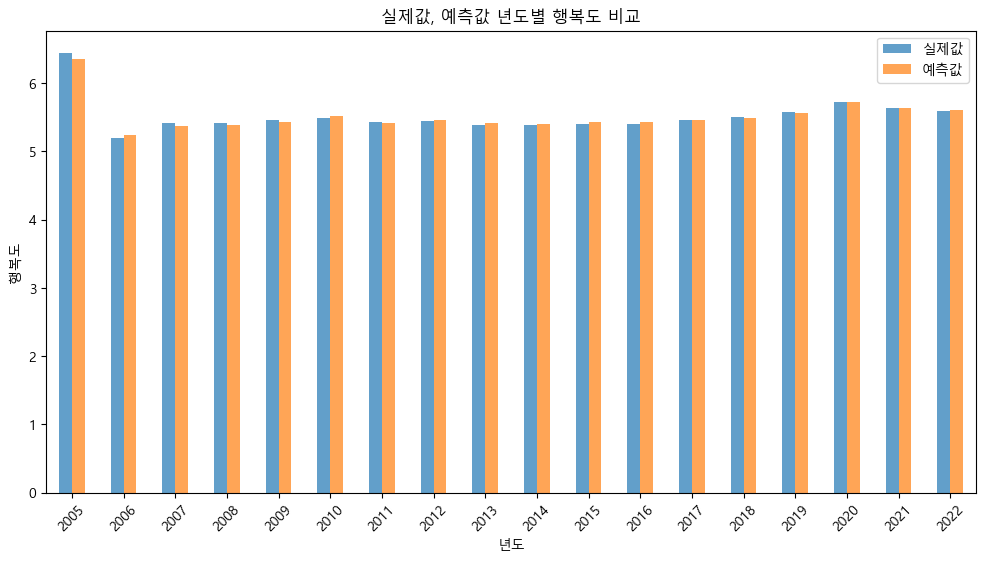

In [69]:
# 예측값과 실제값 비교(년도별)
df_results = df_en.copy()  # 데이터 복사
#print(df_results)
#print(rf_pred)
df_results['Predicted Happiness Score'] = rf_model.predict(X)  # 예측값 추가

plot_happiness_by_year(df_results, year_column='year', 
                        actual_column='Happiness score', 
                        predicted_column='Predicted Happiness Score')

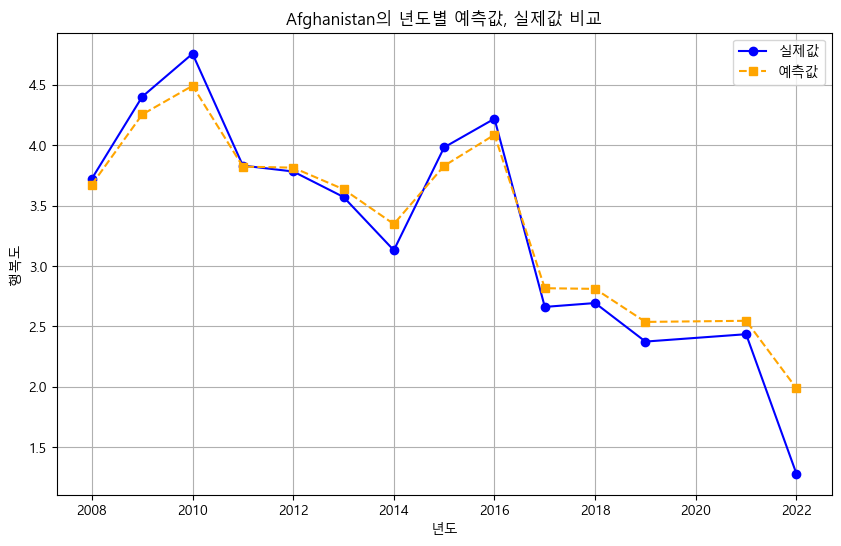

In [112]:
df_results2 = df.copy()  # 데이터 복사
df_results2['Predicted Happiness Score'] = rf_model.predict(X)
plot_happiness_by_country(df_results2, country_column='Country name', 
                          year_column='year', 
                          actual_column='Happiness score', 
                          predicted_column='Predicted Happiness Score', 
                          country_name="Afghanistan")

In [80]:
# 2023 데이터 셋팅
df_2023 = pd.read_csv("dataset/whr2023.csv", encoding="CP949")
print("데이터크기: ", df_2023.shape)
df_2023.head()

데이터크기:  (137, 12)


,Country name,Iso alpha,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,AFG,2023,1.86,7.32,0.34,54.71,0.38,-0.08,0.85,NaN,NaN
1,Albania,ALB,2023,5.28,9.57,0.72,69.15,0.79,-0.01,0.88,NaN,NaN
2,Algeria,DZA,2023,5.33,9.30,0.85,66.55,0.57,-0.12,0.72,NaN,NaN
3,Argentina,ARG,2023,6.02,9.96,0.89,67.20,0.82,-0.09,0.81,NaN,NaN
4,Armenia,ARM,2023,5.34,9.62,0.79,67.79,0.80,-0.15,0.70,NaN,NaN


In [81]:
# 결측치 확인(2023 데이터)
# 데이터셋 설명
# Country name 나라명, Iso alpha ISO나라코드, year 년도, Happiness score 행복도점수, Log GDP per capita 1인당총생산
# Social support 사회지원, Healthy life expectancy at birth 기대수명, Freedom to make life choices 자유인식정도
# Generosity 관대함수준, Perceptions of corruption 부패에대한인식, Positive affect 긍정적 영향, Negative affect 부정적영향
print("결측치 수:\n",df_2023.isnull().sum())

df_2023['Healthy life expectancy at birth'] = df_2023['Healthy life expectancy at birth'].fillna(df['Healthy life expectancy at birth'].mean())        # 기대수명
df_2023['Positive affect'] = df_2023['Positive affect'].fillna(0)        # 기대수명
df_2023['Negative affect'] = df_2023['Negative affect'].fillna(0)        # 기대수명

print("결측치처리 결과:\n",df_2023.isnull().sum())
df_2023.head()

결측치 수:
 Country name                          0
Iso alpha                             0
year                                  0
Happiness score                       0
Log GDP per capita                    0
Social support                        0
Healthy life expectancy at birth      1
Freedom to make life choices          0
Generosity                            0
Perceptions of corruption             0
Positive affect                     137
Negative affect                     137
dtype: int64
결측치처리 결과:
 Country name                        0
Iso alpha                           0
year                                0
Happiness score                     0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64


,Country name,Iso alpha,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,AFG,2023,1.86,7.32,0.34,54.71,0.38,-0.08,0.85,0.00,0.00
1,Albania,ALB,2023,5.28,9.57,0.72,69.15,0.79,-0.01,0.88,0.00,0.00
2,Algeria,DZA,2023,5.33,9.30,0.85,66.55,0.57,-0.12,0.72,0.00,0.00
3,Argentina,ARG,2023,6.02,9.96,0.89,67.20,0.82,-0.09,0.81,0.00,0.00
4,Armenia,ARM,2023,5.34,9.62,0.79,67.79,0.80,-0.15,0.70,0.00,0.00


In [82]:
# 예측 가능한 나라목록
countrys = sorted(df['Country name'].unique())
print("\n예측 가능한 지역:")
display(countrys)


예측 가능한 지역:


['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong S.A.R. of China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Ken

In [ ]:
# 2023 데이터 예측
data_2023 = pd.DataFrame({
    'year' : df_2023['year'],
    'Log GDP per capita' : df_2023['Log GDP per capita'],
    'Social support' : df_2023['Social support'],
    'Healthy life expectancy at birth' : df_2023['Healthy life expectancy at birth'],
    'Freedom to make life choices' : df_2023['Freedom to make life choices'],
    'Generosity' : df_2023['Generosity'],
    'Perceptions of corruption' : df_2023['Perceptions of corruption'],
    'Positive affect' : df_2023['Positive affect'],
    'Negative affect' : df_2023['Negative affect']
    })
rf_pred_2023 = rf_model.predict(data_2023)
y_2023 = df_2023['Happiness score']

[3.38762667 2.96880333 4.76764333 5.72138    4.50522667 6.67279667
 6.60258333 5.96800333 3.32991667 6.74274667 4.38293    4.71972333
 4.80151    3.74041    4.92160333 5.60481    3.68096333 3.32153667
 4.31871    6.71871333 3.74678    5.65771667 5.27593    4.82381333
 4.10767    4.42261667 3.73259667 5.62237    5.85013    6.2239
 6.62826    6.79498333 5.19772    4.70624333 3.48379333 3.36859
 6.45141667 4.17698667 6.71096333 6.61823333 4.12465667 3.60317333
 4.53409667 6.57103333 4.19445667 5.31609    4.69308    3.86415667
 3.45136    5.95296    6.32928667 6.89246    3.48262    4.69174
 4.01849333 3.35585    6.64549    6.84633333 6.57905    4.36476
 4.92542    6.49549    3.32492333 5.76115333 4.22676333 5.10303333
 4.8849     3.52254    6.08283    2.74016667 3.72088    6.69076667
 6.48546667 3.70020333 3.73201333 5.32947    3.64600333 6.85679
 3.54473667 5.60627    5.29899667 4.87771667 5.15779    5.65028333
 3.40194333 4.06918667 4.36131667 4.45800333 3.44714333 6.69765667
 6.53453667

<Figure size 1000x600 with 0 Axes>

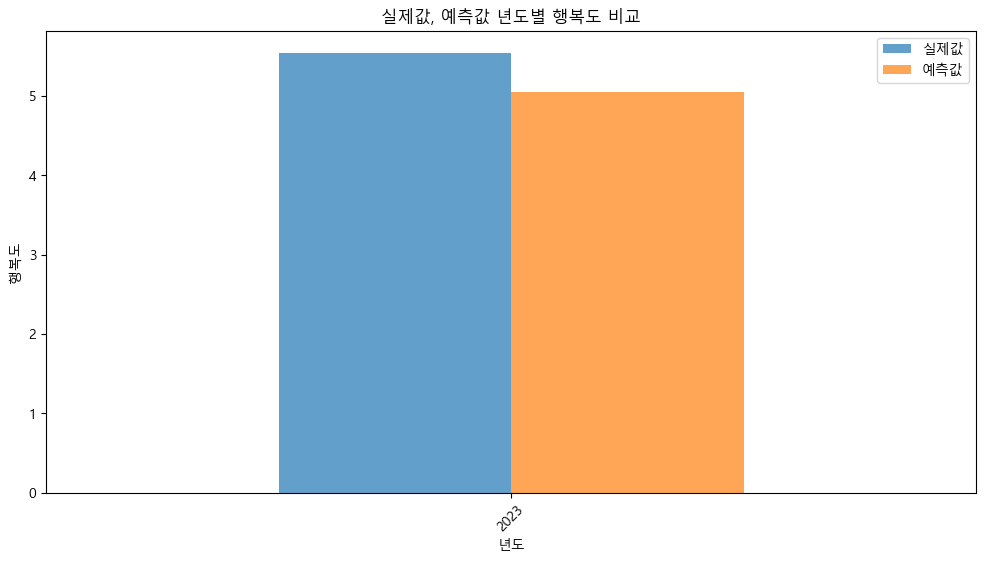

In [89]:
# 예측값과 실제값 비교(년도별)
df_results_2023 = df_2023.copy()  # 데이터 복사
#print(df_results)
#print(rf_pred)
df_results_2023['Predicted Happiness Score'] = rf_pred_2023  # 예측값 추가

plot_happiness_by_year(df_results_2023, year_column='year', 
                        actual_column='Happiness score', 
                        predicted_column='Predicted Happiness Score')

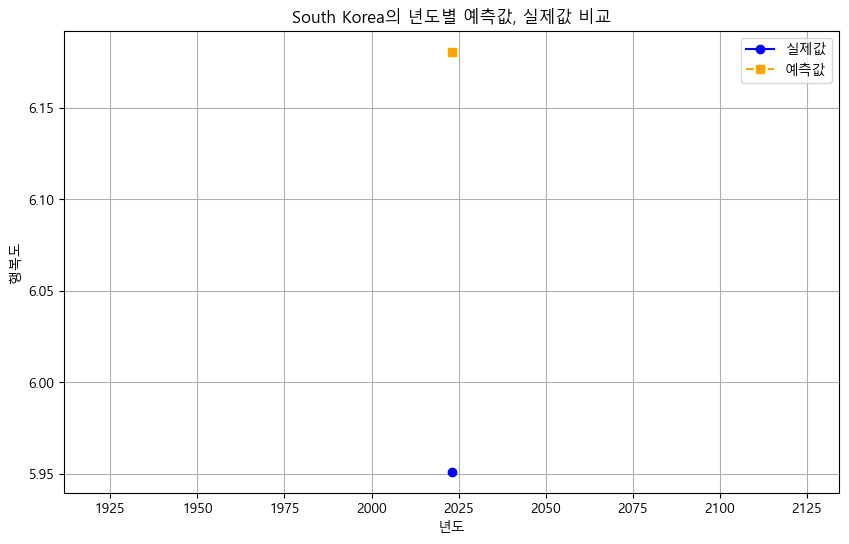

In [91]:
#df_results2 = df.copy()  # 데이터 복사
df_results_2023['Predicted Happiness Score'] = rf_pred_2023
plot_happiness_by_country(df_results_2023, country_column='Country name', 
                          year_column='year', 
                          actual_column='Happiness score', 
                          predicted_column='Predicted Happiness Score', 
                          country_name="South Korea")

In [21]:
# 년도별 행복 점수 시각화 함수
def plot_happiness_by_year(df, year_column, actual_column, predicted_column):
    plt.figure(figsize=(10, 6))
    
    df_grouped = df.groupby(year_column)[[actual_column, predicted_column]].mean()

    df_grouped.plot(kind='bar', figsize=(12, 6), alpha=0.7)
    plt.xlabel("년도")
    plt.ylabel("행복도")
    plt.title("실제값, 예측값 년도별 행복도 비교")
    plt.legend(["실제값", "예측값"])
    plt.xticks(rotation=45)
    plt.show()

In [29]:
# 국가별 행복 점수 시각화 함수
def plot_happiness_by_country(df, country_column, year_column, actual_column, predicted_column, country_name):
    plt.figure(figsize=(10, 6))
    
    df_country = df[df[country_column] == country_name]
    df_country = df_country.sort_values(by=year_column)

    plt.plot(df_country[year_column], df_country[actual_column], marker='o', linestyle='-', label="실제값", color='blue')
    plt.plot(df_country[year_column], df_country[predicted_column], marker='s', linestyle='--', label="예측값", color='orange')

    plt.xlabel("년도")
    plt.ylabel("행복도")
    plt.title(f"{country_name}의 년도별 예측값, 실제값 비교")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
st.title('두 나라의 행복도 비교')

# 사용자 입력: 비교할 나라 2개 선택
country1 = st.selectbox('첫 번째 나라를 선택하세요:', df['Country name'])
country2 = st.selectbox('두 번째 나라를 선택하세요:', df['Country name'])

# 선택한 나라들의 행복도 필터링
selected_countries = df[df['Country name'].isin([country1, country2])]

# 행복도 점수 비교
st.write(f"{country1}과 {country2}의 행복도 비교")

# 행복도 점수 시각화
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Country name', y='Predicted Happiness Score', data=selected_countries, ax=ax, palette='viridis')

# 그래프 레이블 설정
ax.set_title('두 나라의 행복도 비교', fontsize=14)
ax.set_ylabel('행복도 점수', fontsize=12)
ax.set_xlabel('나라', fontsize=12)

# 그래프 보여주기
st.pyplot(fig)